In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn wordcloud gensim
 

   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   --- ----------------------------------- 30.7/299.9 kB 325.1 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/299.9 kB 409.6 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/299.9 kB 595.3 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/299.9 kB 807.1 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/299.9 kB 983.0 kB/s eta 0:00:01
   -------------------------------------- 299.9/299.9 kB 975.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud

In [5]:
data = pd.read_excel('responses.xlsx')
data.columns = [
    "Timestamp", "Age", "Computer Literacy", "Occupation", 
    "Encountered Fraud", "Frequency of Fraud", 
    "Fraud Types", "Precautions", "Confidence in Detection", 
    "Successfully Prevented", "Data Sought by Attackers", 
    "Response to Fraud Attempts", "Victim of Fraud", 
    "Solved the Issue", "Reported Fraud", 
    "User Awareness", "Improvement Suggestions"
]

In [22]:
display(data.head(10))


,Timestamp,Age,Computer Literacy,Occupation,Encountered Fraud,Frequency of Fraud,Fraud Types,Precautions,Confidence in Detection,Successfully Prevented,Data Sought by Attackers,Response to Fraud Attempts,Victim of Fraud,Solved the Issue,Reported Fraud,User Awareness,Improvement Suggestions
0,2024-05-24 12:40:07.549,- 18-24 года,- Средний,- Студент,- Да,- Иногда,"По звонку, Через SMS, Предложение услуги или в...","- Проверяю подлинность отправителя сообщений, ...",- Не совсем уверен(а),- Не уверен(а),"- Учётные данные (логины и пароли), - Финансов...","- Игнорирую сообщение/звонок, - Проверяю подли...",- Не уверен(а),- Не сталкивались с атакой,"- Нет, я решал все лично","- Нет, недостаточно","- Обучающие программы и семинары, - Размещение..."
1,2024-05-24 12:41:54.497,- 25-34 года,- Начальный,- Не могу сказать,- Да,- Иногда,"По звонку, Притворство доверенным лицом, рассы...",- Не открываю ссылки и вложения от неизвестных...,- Не совсем уверен(а),- Не уверен(а),"- Учётные данные (логины и пароли), - Финансов...",- Сообщаю друзьям и коллегам,- Да,"- Нет, не смогли решить или все еще решаем","- Нет, я решал все лично","- Да, достаточно",- Размещение информационных материалов (статьи...
2,2024-05-24 13:00:35.457,- 18-24 года,- Средний,- Студент,- Не уверен(а),- Иногда,"Через электронные письма(Фишинг), По звонку, Ч...",- Регулярное обновление паролей,- Полностью,- Да,"- Учётные данные (логины и пароли), - Финансов...",- Игнорирую сообщение/звонок,- Нет,- Не сталкивались с атакой,"- Нет, я решал все лично","- Нет, недостаточно",- Обучающие программы и семинары
3,2024-05-24 13:03:02.868,- 18-24 года,- Средний,- Студент,- Не уверен(а),- Не уверен(а),"По звонку, Через SMS",- Не открываю ссылки и вложения от неизвестных...,- Не совсем уверен(а),- Нет,"- Учётные данные (логины и пароли), - Персонал...",- Игнорирую сообщение/звонок,- Да,- Частично,"- Нет, я решал все лично","- Нет, недостаточно","- Обучающие программы и семинары, - Размещение..."
4,2024-05-24 13:03:50.232,- 25-34 года,- Средний,- IT-специалист,- Не уверен(а),- Иногда,Приманивание с целью установки вредоносного ПО,- Не открываю ссылки и вложения от неизвестных...,- Не совсем уверен(а),- Да,"- Персональные данные (имя, дата рождения, адр...",- Сообщаю в соответствующие органы или службу ...,- Да,"- Нет, не смогли решить или все еще решаем",- Да,"- Нет, недостаточно","- Обучающие программы и семинары, - Размещение..."
5,2024-05-24 13:06:53.956,- 18-24 года,- Высокий,- Студент,- Да,- Часто,"Через электронные письма(Фишинг), По звонку, П...","- Проверяю подлинность отправителя сообщений, ...",- Полностью,- Да,"- Учётные данные (логины и пароли), - Финансов...","- Игнорирую сообщение/звонок, - Проверяю подли...",- Да,"- Нет, не смогли решить или все еще решаем","- Нет, я решал все лично","- Нет, недостаточно",- Размещение информационных материалов (статьи...
6,2024-05-24 13:07:24.108,- 18-24 года,- Начальный,- Безработный,- Не уверен(а),- Редко,Через электронные письма(Фишинг),"- Использую антивирусное ПО, - Проверяю подлин...",- Не совсем уверен(а),- Нет,- Учётные данные (логины и пароли),"- Игнорирую сообщение/звонок, - Проверяю подли...",- Нет,- Не сталкивались с атакой,"- Нет, я решал все лично","- Нет, недостаточно","- Улучшение технологий защиты (антивирусы, фил..."
7,2024-05-24 13:08:23.422,- 18-24 года,- Средний,- IT-специалист,- Нет,- Никогда,"Через электронные письма(Фишинг), По звонку, Ч...","- Использую антивирусное ПО, - Не открываю ссы...",- Полностью,- Да,"- Учётные данные (логины и пароли), - Персонал...",- Игнорирую сообщение/звонок,- Нет,"- Да, полностью","- Нет, я решал все лично","- Нет, недостаточно",- Размещение информационных материалов (статьи...
8,2024-05-24 14:21:49.482,- 35-44 года,- Высокий,- Работник офиса,- Да,- Редко,"Через электронные письма(Фишинг), По звонку, П...","- Использую антивирусное ПО, - Двойная аутенти...",- Полностью,- Да,"- Учётные данные (логины и пароли), - Персонал...","- Игнорирую сообщение/звонок, - Сообщаю в соот...",- Да,"- Д

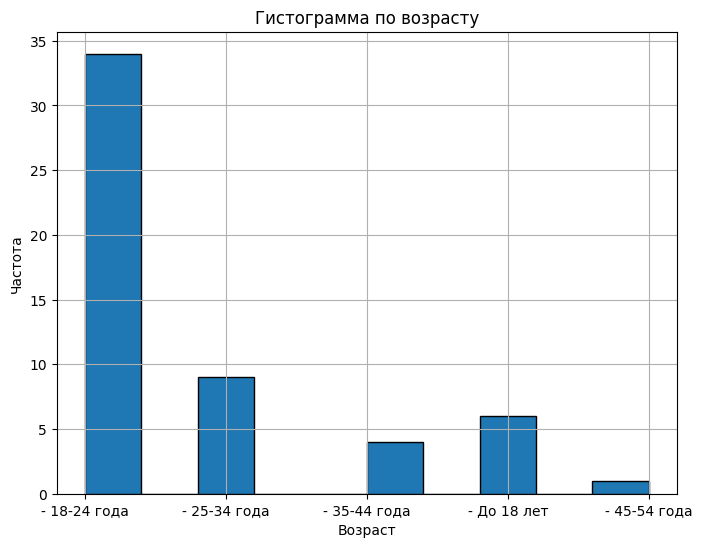

In [59]:
if 'Age' in data.columns:
    # Строим гистограмму для столбца 'Age'
    plt.figure(figsize=(8, 6))
    plt.hist(data['Age'], bins=10, edgecolor='black')
    plt.title('Гистограмма по возрасту')
    plt.xlabel('Возраст')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()
else:
    print("Столбец 'Age' не найден в данных.")

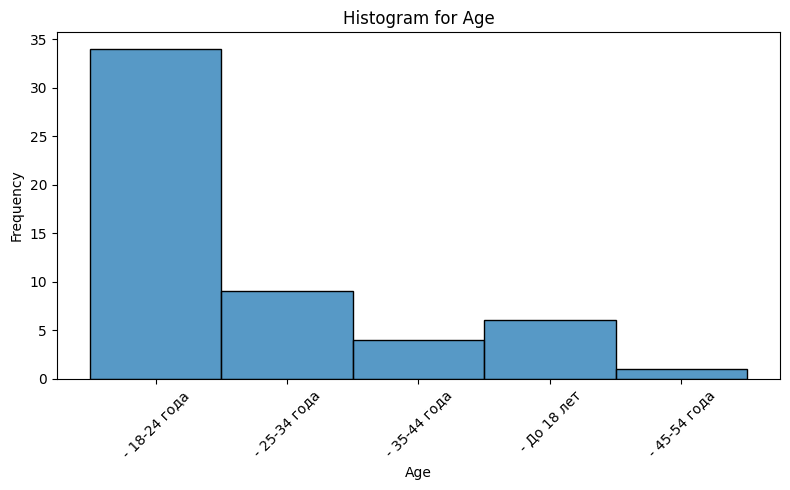

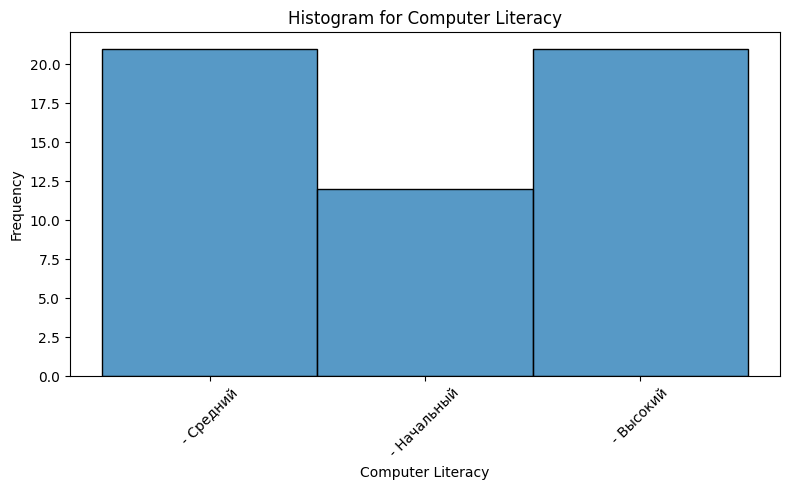

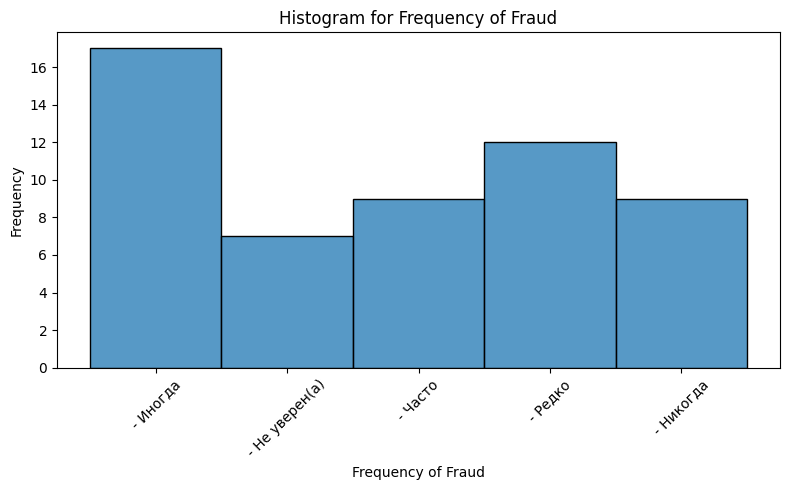

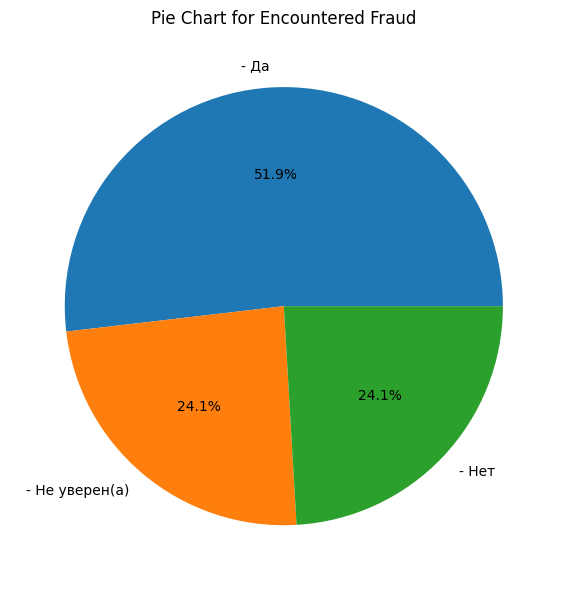

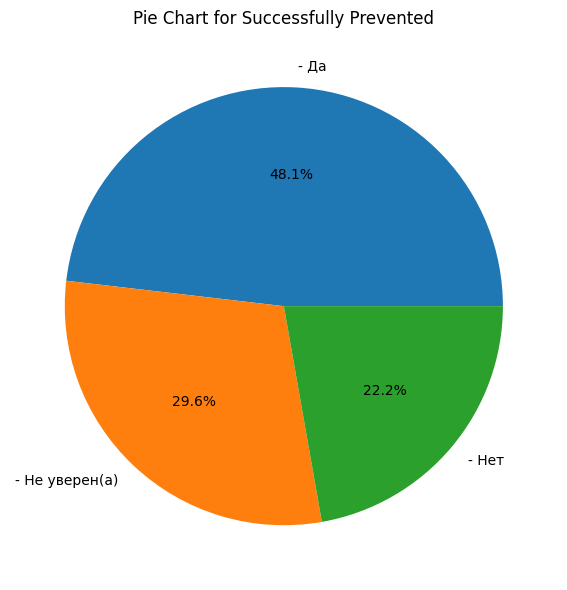

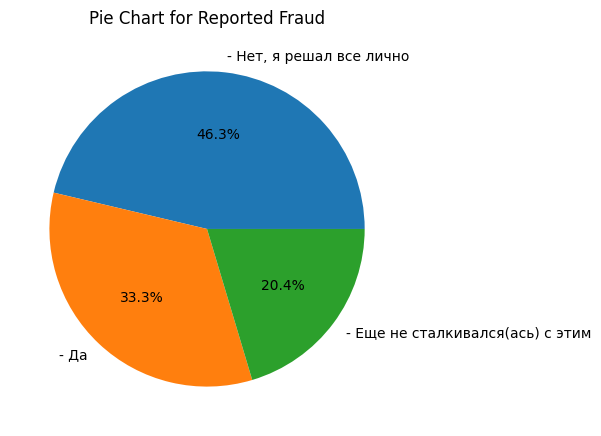

In [24]:
def plot_histograms(df, columns):
    for col in columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(data[col], kde=False, bins=10)
        plt.title(f"Histogram for {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

def plot_pie_charts(df, columns):
    for col in columns:
        plt.figure(figsize=(6, 6))
        data[col].value_counts().plot.pie(autopct='%1.1f%%')
        plt.title(f"Pie Chart for {col}")
        plt.ylabel('')
        plt.tight_layout()
        plt.show()

plot_histograms(data, ["Age", "Computer Literacy", "Frequency of Fraud"])
plot_pie_charts(data, ["Encountered Fraud", "Successfully Prevented", "Reported Fraud"])

In [25]:
numeric_data = pd.get_dummies(data, drop_first=True)

In [28]:
data_encoded = data.copy()


In [29]:
label_encoder = LabelEncoder()
for column in data_encoded.select_dtypes(include='object').columns:
    data_encoded[column] = label_encoder.fit_transform(data_encoded[column])

In [30]:
# Удаляем все столбцы с датами, если они есть
data_encoded = data_encoded.drop(columns=['Timestamp'], errors='ignore')


In [31]:
# Преобразуем данные в формат, подходящий для KMeans
numeric_data = data_encoded.select_dtypes(include=[np.number])


In [32]:
kmeans_original = KMeans(n_clusters=3, random_state=0)
clusters_original = kmeans_original.fit_predict(numeric_data)


C:\Users\shinbuu\anaconda3\envs\pyspark-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shinbuu\anaconda3\envs\pyspark-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [35]:
# K-Means with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(numeric_data)
kmeans_pca = KMeans(n_clusters=3, random_state=0)
clusters_pca = kmeans_pca.fit_predict(reduced_data)

C:\Users\shinbuu\anaconda3\envs\pyspark-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shinbuu\anaconda3\envs\pyspark-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


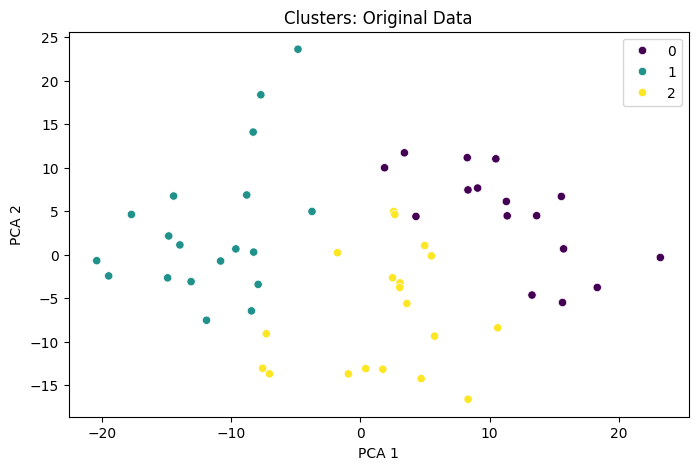

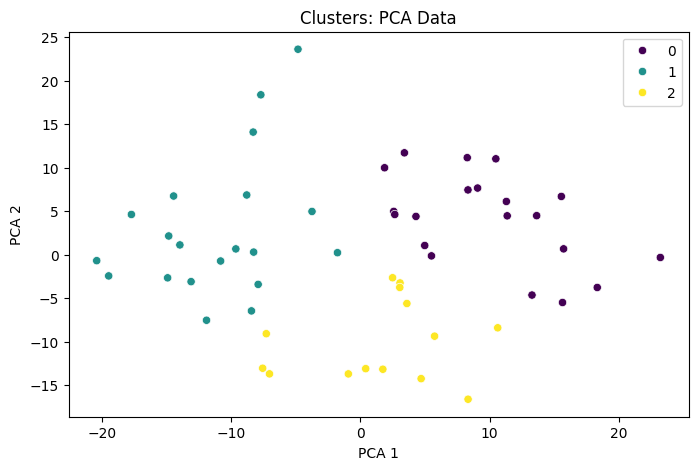

In [36]:
# Scatter plot for clustering
def plot_clusters(data, clusters, title):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters, palette="viridis", legend="full")
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.show()

plot_clusters(reduced_data, clusters_original, "Clusters: Original Data")
plot_clusters(reduced_data, clusters_pca, "Clusters: PCA Data")

In [48]:
import gensim.downloader as api
from gensim.models import KeyedVectors
import re

In [45]:
# model = api.load("word2vec-google-news-300")
# Функция для замены текста на основе модели
#def translate_with_nlp(occupation):
#    work_keywords = ['работа', 'специалист', 'офис', 'IT', 'работаю']
#    for keyword in work_keywords:
#        try:
#            # Проверяем схожесть с работой, например, с помощью cosine similarity
#            similarity = model.similarity(keyword, occupation)
#            if similarity > 0.5:  # Пороговое значение для нахождения схожести
#                return 'Работаю'
#        except KeyError:
 #           continue  # Если слова нет в модели, пропускаем
#    return occupation  # Возвращаем оригинальное значение, если нет соответствий

# Применяем функцию к столбцу
#df['Occupation'] = df['Occupation'].apply(translate_with_nlp)

In [55]:
# Список фраз, которые нужно заменить
work_related_keywords = ['IT-специалист', 'Работник офиса', 'Работаю в сфере IT', 'Программист', 'Офисный работник', 'Работаю','Бортпроводник']

# Функция для замены
def translate_occupation(occupation):
    for keyword in work_related_keywords:
        if re.search(keyword, occupation, re.IGNORECASE):  # Игнорируем регистр
            return 'Работаю'
    return occupation  # Возвращаем оригинальное значение, если не найдено совпадение

# Применяем функцию к столбцу
data['Occupation'] = data['Occupation'].apply(translate_occupation)

In [57]:
# Удаляем все специальные символы (например, -, =, и т.д.)
data['Occupation'] = data['Occupation'].str.replace(r'[^\w\s]', '', regex=True)

# Выводим результат
print(data)

                 Timestamp           Age Computer Literacy        Occupation  \
0  2024-05-24 12:40:07.549  - 18-24 года         - Средний           Студент   
1  2024-05-24 12:41:54.497  - 25-34 года       - Начальный   Не могу сказать   
2  2024-05-24 13:00:35.457  - 18-24 года         - Средний           Студент   
3  2024-05-24 13:03:02.868  - 18-24 года         - Средний           Студент   
4  2024-05-24 13:03:50.232  - 25-34 года         - Средний           Работаю   
5  2024-05-24 13:06:53.956  - 18-24 года         - Высокий           Студент   
6  2024-05-24 13:07:24.108  - 18-24 года       - Начальный       Безработный   
7  2024-05-24 13:08:23.422  - 18-24 года         - Средний           Работаю   
8  2024-05-24 14:21:49.482  - 35-44 года         - Высокий           Работаю   
9  2024-05-24 15:01:17.364   - До 18 лет       - Начальный       Безработный   
10 2024-05-24 15:22:13.831  - 25-34 года         - Высокий       Безработный   
11 2024-05-24 15:23:51.850  - 18-24 года

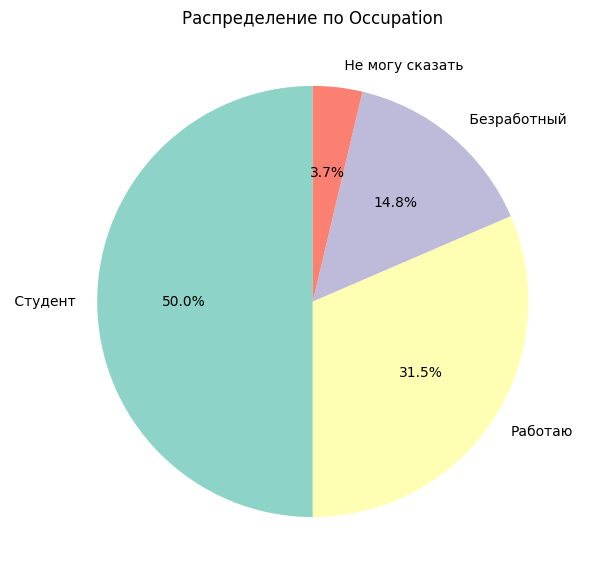

C:\Users\shinbuu\AppData\Local\Temp\ipykernel_18192\321683034.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Occupation', palette="Set3")


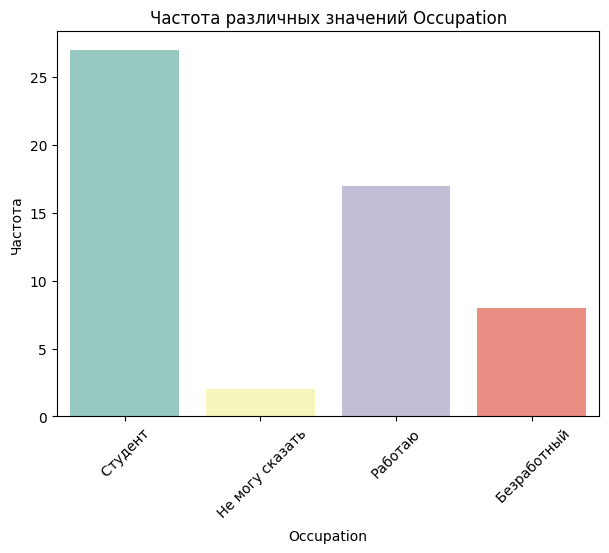

In [58]:
occupation_counts = data['Occupation'].value_counts()

plt.figure(figsize=(7, 7))
occupation_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(occupation_counts)))
plt.title('Распределение по Occupation')
plt.ylabel('')
plt.show()

# Гистограмма (bar plot)
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x='Occupation', palette="Set3")
plt.title('Частота различных значений Occupation')
plt.xlabel('Occupation')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()